# Mathplotlib

## базові діаграми та методи їх побудови

#### Підготовка
- Charts in Colaboratory[https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=JGnotb1n73Yk]
- документація бібліотеки matplotlib[https://matplotlib.org/stable/users/index.html]
- документація бібліотеки seaborn[https://seaborn.pydata.org/]


In [37]:
#pip install matplotlib

In [38]:
%matplotlib inline

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # використаємо для завантаження датасету


# plt - загальноприйняте позначення для mathplotlib.pyplot

In [46]:
# параметри виведення
pd.set_option("display.max_columns", 500)  # кількість колонок
pd.set_option("display.max_rows", 1000)  # кількість рядків
pd.set_option("display.max_colwidth", 300)  # ширина колонок
pd.set_option("display.precision", 7)  # кількість знаків після коми

In [41]:
data = sns.load_dataset("titanic")

In [42]:
data.head(10) # виведемо перші 10 рядків датасету

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### Variable Notes
- PassengerId Unique ID of the passenger
- Survived Survived (1) or died (0)
- Pclass Passenger’s class (1st, 2nd, or 3rd)
- Name Passenger’s name
- Sex Passenger’s sex
- Age Passenger’s age
- SibSp Number of siblings/spouses aboard the Titanic
- Parch Number of parents/children aboard the Titanic
- Ticket Ticket number
- Fare Fare paid for ticket
- Cabin Cabin number
- Embarked Where the passenger got on the ship (C — Cherbourg, S — Southampton, Q = Queenstown)

In [43]:
# для кожного віку знайти середнє значення вартості квитка

df = data.groupby(
    "age",
    as_index=False,  # as_index=False - не робити індексом стовпець, по якому групуємо
)["fare"].mean()

In [47]:
df

,age,fare
0,0.42,8.5167000
1,0.67,14.5000000
2,0.75,19.2583000
3,0.83,23.8750000
4,0.92,151.5500000
5,1.00,30.0059571
6,2.00,37.5362500
7,3.00,25.7819500
8,4.00,29.5433300
9,5.00,22.7177000


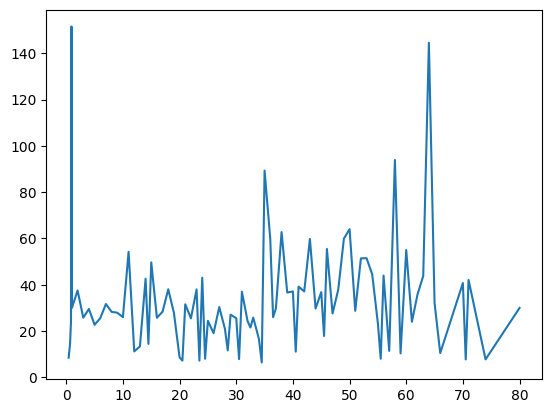

In [55]:
# найпростіший графік
plt.plot(df["age"], df["fare"])

plt.savefig("simple_plot.png")
# збереження графіка з діаграмою в файл

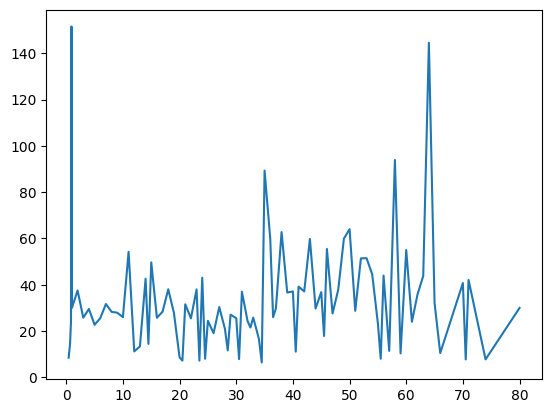

In [59]:
plt.plot(df["age"], df["fare"])
plt.show() # виведення графіка на екран (використовується, якщо не використовуємо Jupyter Notebook)

In [60]:
# зробити групи за віком з кроком в 10 років і розрахувати для кожного віку відсоток виживших

data["age_group"] = data["age"] // 10 * 10
# // - цілочисельне ділення
# 10 * 10 - крок в 10 років

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.0


In [61]:
df = data.groupby(
    "age_group",
    as_index=False,
)["survived"].mean()

In [62]:
df.head()

,age_group,survived
0,0.0,0.6129032
1,10.0,0.4019608
2,20.0,0.3500000
3,30.0,0.4371257
4,40.0,0.3820225


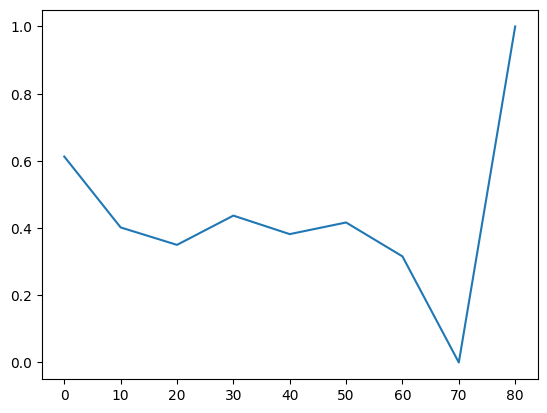

In [63]:
plt.plot(df["age_group"], df["survived"])
plt.show()  # виведення графіка на екран (використовується, якщо не використовуємо Jupyter Notebook)

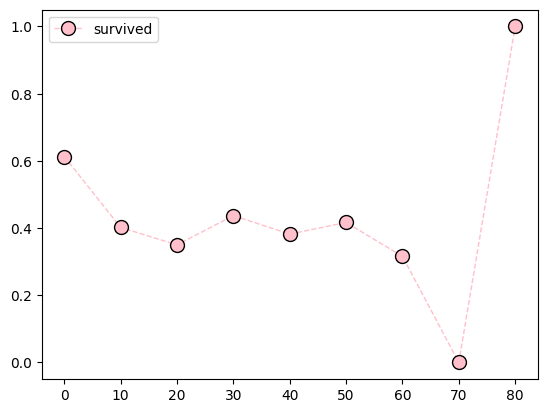

In [98]:
plt.plot(df["age_group"], df["survived"],
         label="survived",  # label - підпис графіка
         color="pink",  # колір графіка
         marker="o",  # тип маркера (s,o)
         linestyle="--",  # тип лінії
         linewidth=1,  # товщина лінії
         markersize=10,  # розмір маркера
         markeredgecolor="black",  # колір межі маркера
         )
plt.legend()  # виведення легенди

# Аргументи функції plot можна задавати в будь-якому порядку

# щоб побачити всі аргументи функції plot скористайтеся документацією: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

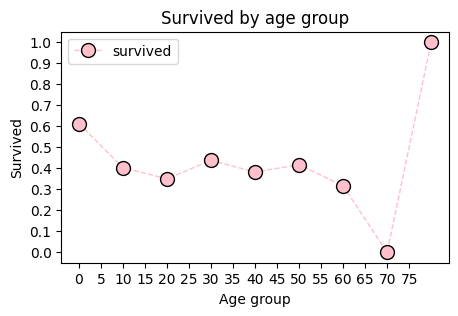

In [99]:
# підхід 2 - ініціюючи фігуру

plt.figure(figsize=(5, 3))  # figsize - розмір фігури

plt.plot(
    df["age_group"],
    df["survived"],
    label="survived",  # label - підпис графіка
    color="pink",  # колір графіка
    marker="o",  # тип маркера (s,o)
    linestyle="--",  # тип лінії
    linewidth=1,  # товщина лінії
    markersize=10,  # розмір маркера
    markeredgecolor="black",  # колір межі маркера
)
plt.legend()  # виведення легенди


plt.title("Survived by age group")  # заголовок графіка
plt.xlabel("Age group")  # підпис осі X
plt.ylabel("Survived")  # підпис осі Y

plt.xticks(np.arange(0, 80, 5))  # задаємо мітки на осі X
# np.arange(0, 80, 10) - масив значень від 0 до 80 з кроком 10
plt.yticks(np.arange(0, 1.1, 0.1))  # задаємо мітки на осі Y
# np.arange(0, 1.1, 0.1) - масив значень від 0 до 1 з кроком 0.1

plt.show()  # виведення графіка на екран (використовується, якщо не використовуємо Jupyter Notebook)

# оформлення графіка

# усі наявні методи для оформлення pyplot можна подивитися тут: https://matplotlib.org/stable/api/pyplot_summary.html

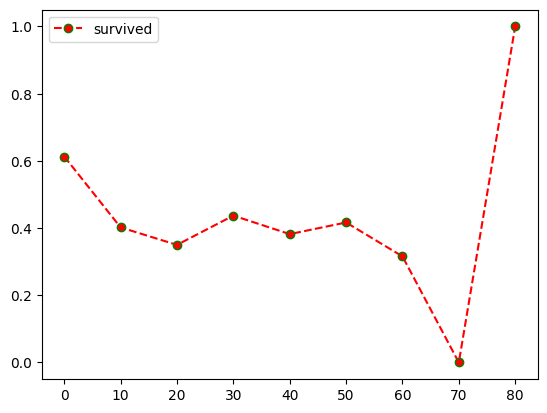

In [101]:
plt.plot(df["age_group"], df["survived"], 'ro--', label="survived", markeredgecolor = 'green')
plt.legend()
plt.show()

# використання швидкого форматування

In [103]:
# виведення двох графіків на одному полотні

# зробити групи за віком з кроком в 10 років і розрахувати для кожного віку відсоток виживших в розрізі статі
df = data.groupby(
    ["age_group", "sex"],
    as_index=False,
)["survived"].mean()

# Фільтруємо дані для чоловіків і жінок
df_male = df[df["sex"] == "male"]
df_female = df[df["sex"] == "female"]

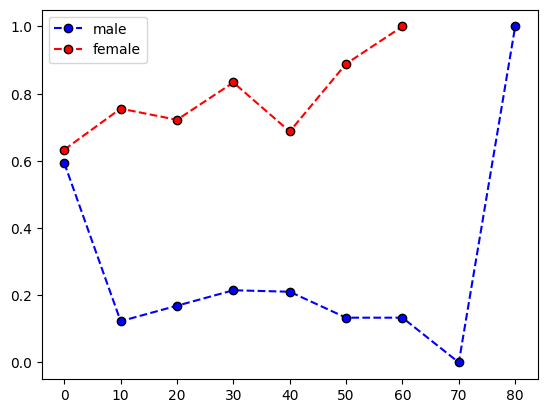

In [105]:
plt.plot(
    df_male["age_group"],
    df_male["survived"],
    "bo--",
    label="male",
    markeredgecolor="black",
)

plt.plot(
    df_female["age_group"],
    df_female["survived"],
    "ro--",
    label="female",
    markeredgecolor="black",
)


plt.legend()
plt.show()

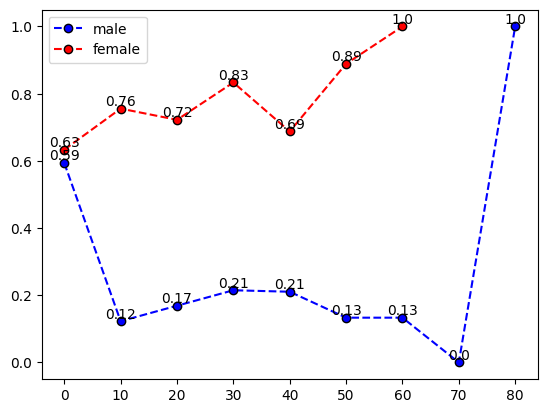

In [107]:
plt.plot(
    df_male["age_group"],
    df_male["survived"],
    "bo--",
    label="male",
    markeredgecolor="black",
)

# вивести значення на графіку
for i, v in zip(df_male["age_group"], df_male["survived"]):
    plt.annotate(text=round(v, 2), xy=(i, v), ha="center", va="bottom")


plt.plot(
    df_female["age_group"],
    df_female["survived"],
    "ro--",
    label="female",
    markeredgecolor="black",
)
# вивести значення на графіку
for i, v in zip(df_female["age_group"], df_female["survived"]):
    plt.annotate(text=round(v, 2), xy=(i, v), ha="center", va="bottom") # ha - горизонтальне вирівнювання, va - вертикальне вирівнювання

plt.legend()
plt.show()

In [110]:
# знайти кількісь чоловіків і жінок на кораблі

df = data.groupby('sex' , as_index=False)['survived'].count()   # as_index=False - не робити індексом стовпець, по якому групуємо   

In [111]:
df

,sex,survived
0,female,314
1,male,577


In [112]:
data.shape[0]

891

In [113]:
df["gender_share"] = round(df.survived / data.shape[0], 2)
df

,sex,survived,gender_share
0,female,314,0.35
1,male,577,0.65


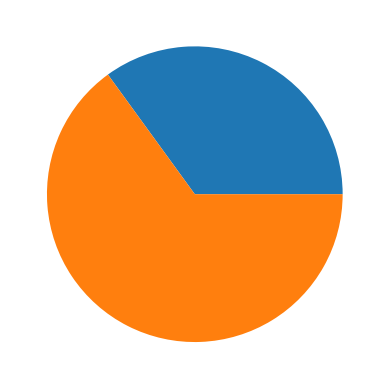

In [114]:
plt.pie(
    df["gender_share"],
);

# кругова діаграма

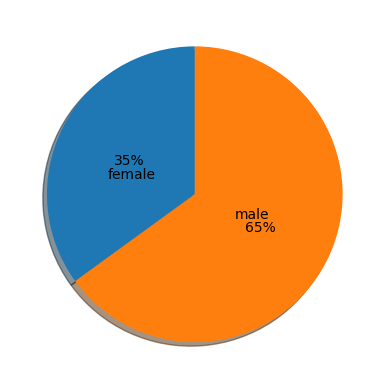

In [123]:
plt.pie(
    df["gender_share"],
    labels=df['sex'].unique(),  # назви
    autopct="%.0f%%",  # відсотки з округленням до 1 знаків після коми
    pctdistance=0.50,  # відстань від центру до відсотків
    shadow=True,  # тінь
    startangle=90,  # початковий кут
    labeldistance=0.3,  # відстань від центру до назви
);

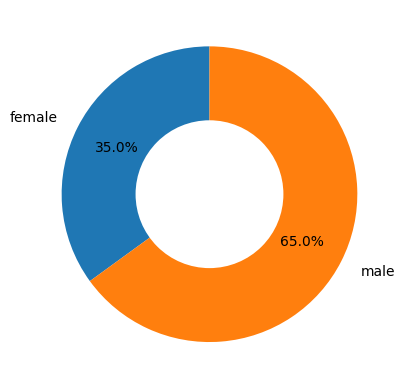

In [128]:
plt.pie(
    df["gender_share"],
    labels=df["sex"].unique(),  # назви
    autopct="%.1f%%",  # відсотки з округленням до 1 знаків після коми
    pctdistance=0.70,  # відстань від центру до відсотків
    startangle=90,  # початковий кут
    labeldistance=1.15,  # відстань від центру до назви
)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc="white") # (0, 0) - координати центру кола, 0.70 - радіус кола, fc="white" - колір кола
fig = plt.gcf() # gcf - get current figure

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

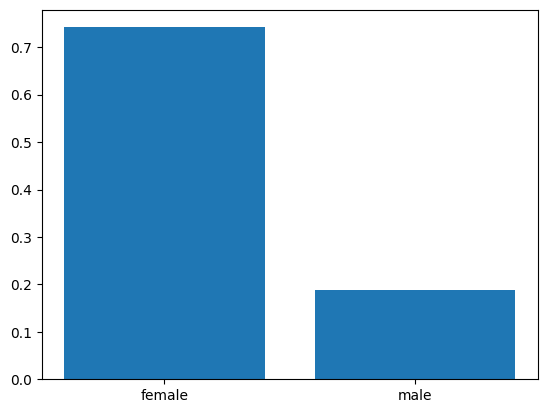

In [129]:
# Побудова стовпчатої діаграми (вертикальна)

df = data.groupby("sex", as_index=False)[
    "survived"
].mean()  # as_index=False - не робити індексом стовпець, по якому групуємо


plt.bar(df["sex"], df["survived"])
plt.show()

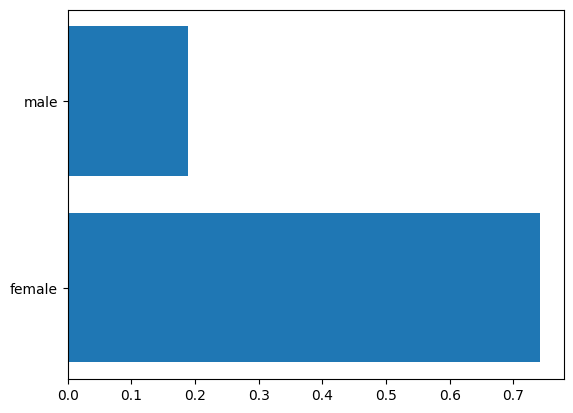

In [130]:
plt.barh(df["sex"], df["survived"])
plt.show()


# Побудова стовпчатої діаграми (горизонтальна)

In [131]:
df

,sex,survived
0,female,0.7420382
1,male,0.1889081


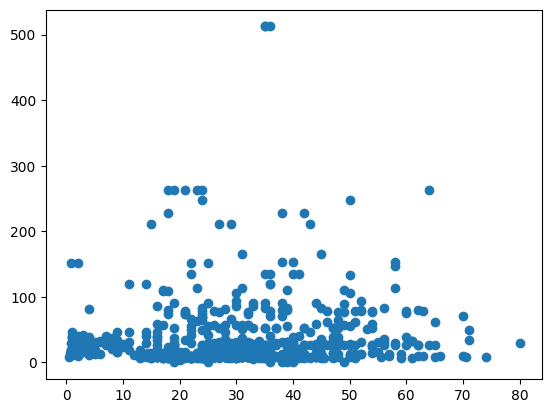

In [133]:
# діаграма розсіювання

plt.scatter(data["age"], data["fare"])
plt.show()

In [134]:
x = np.random.rand(100)
y = np.random.rand(100)

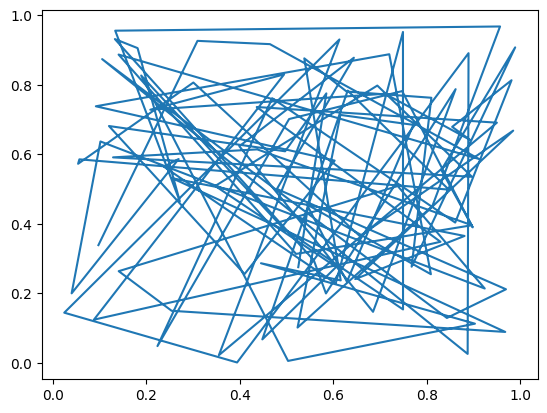

In [135]:
plt.plot(x, y);

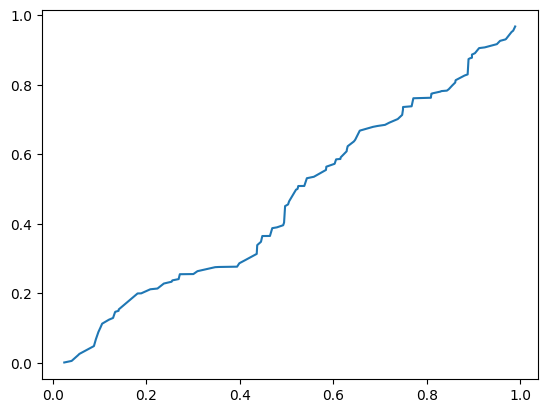

In [136]:
plt.plot(np.sort(x), np.sort(y));

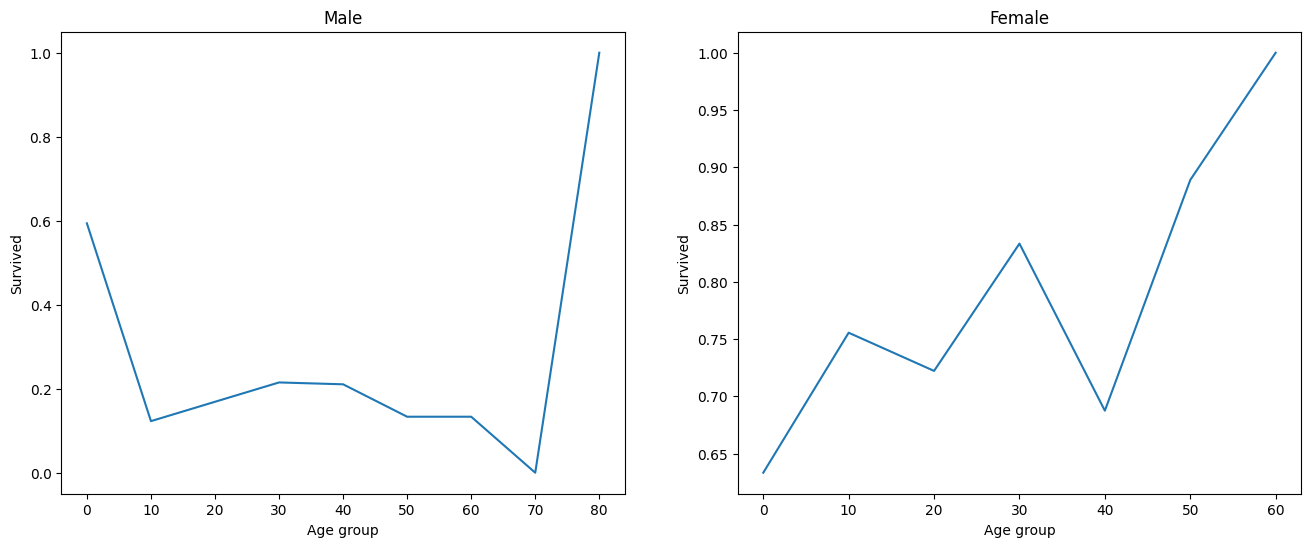

In [138]:
# якщо хочемо побудувати декілька графіків на одному полотні
fig, ax = plt.subplots(
    figsize=(16, 6), nrows=1, ncols=2
)  # figsize - розмір фігури, nrows - кількість рядків, ncols - кількість стовпців

ax[0].plot(
    df_male["age_group"],
    df_male["survived"],
)
ax[0].set_title("Male")
ax[0].set_xlabel("Age group")
ax[0].set_ylabel("Survived")



ax[1].plot(
    df_female["age_group"],
    df_female["survived"],
)
ax[1].set_title("Female")
ax[1].set_xlabel("Age group")
ax[1].set_ylabel("Survived")

plt.show()

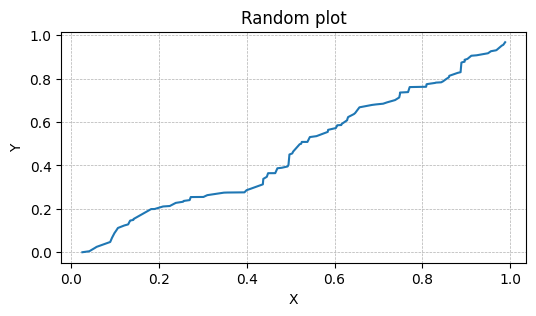

In [142]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(np.sort(x), np.sort(y))
ax.set_title("Random plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid( linewidth=0.5, linestyle="dashed")  # сітка з параметрами (товщина лінії, тип лінії)

In [ ]:
# які підводні камені коли різні графіки?

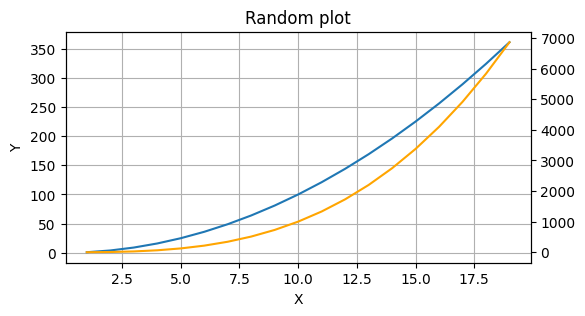

In [148]:
x1 = np.arange(1, 20, 1) # масив значень від 1 до 20 з кроком 1
y1 = x1**2

x2 = np.arange(1, 20, 1) # масив значень від 1 до 20 з кроком 1
y2 = x2**3

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(x1,y1)
ax.set_title("Random plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()  # сітка

ax2 = ax.twinx()
ax2.plot(x2,y2, color = 'orange')

# ax.grid( linewidth=0.5, linestyle="dashed")  # сітка з параметрами (товщина лінії, тип лінії)

##### Більше типів графіків та прикладів можна знайти тут: https://matplotlib.org/stable/gallery/index.html